In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/train.csv
/kaggle/input/gender_submission.csv
/kaggle/input/test.csv


**ABOUT THE TITANIC**

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

**ABOUT THE DATA**

The data in the data set can be broadly classified into two types categorical and continous 
Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
Continous: Age, Fare. Discrete: SibSp, Parch.



Import the packages required while processing the data. the packages like numpy ,pandas are important while loading and preprocessing the data
seaborn and matplotlib are some packages that are used to display the contents of the data set in a graphical/visual manner.


In [2]:

import numpy as np
import pandas as pd
import re as re
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier #KNN



The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. 

**info()**

using info() displays the details of all the labels and the count of all the non null objects, (i.e).,Print a concise summary of a DataFrame.

In [3]:
train_df=pd.read_csv("../input/train.csv")
test_df=pd.read_csv("../input/test.csv")
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**describe()**

describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [4]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**head():**

Pandas head() method is used to return top n (5 by default) rows of a data frame or series.

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**columns:**

returns column names as an array (which is “an index”)

In [7]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

we find the number of missing values in each of the columns and we find out this in terms of % and display this in order to find the effect of missing values in the data set.

In [8]:
total=train_df.isnull().sum().sort_values()
percent_1=train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values()
missing_data=pd.concat([total,percent_2],axis=1,keys=['total','percent'])
print(missing_data)


             total  percent
PassengerId      0      0.0
Survived         0      0.0
Pclass           0      0.0
Name             0      0.0
Sex              0      0.0
SibSp            0      0.0
Parch            0      0.0
Ticket           0      0.0
Fare             0      0.0
Embarked         2      0.2
Age            177     19.9
Cabin          687     77.1


we can see that nearly 77% of the data in the cabin column is missing so we must drop the column because filling it will result in errors
the age has 19% of its data missing but only 2 of the data from embarked are missing so we try to display the data

In [9]:
total1=test_df.isnull().sum().sort_values()
percent1_1=test_df.isnull().sum()/test_df.isnull().count()*100
percent1_2 = (round(percent1_1, 1)).sort_values()
missing_data1=pd.concat([total1,percent1_2],axis=1,keys=['total','percent'])
print(missing_data1)

             total  percent
PassengerId      0      0.0
Pclass           0      0.0
Name             0      0.0
Sex              0      0.0
SibSp            0      0.0
Parch            0      0.0
Ticket           0      0.0
Embarked         0      0.0
Fare             1      0.2
Age             86     20.6
Cabin          327     78.2


In [10]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


we can observe that the fare is 80.0 and it is a first class ticket category
and most of the first class are embarked on port "C" so we assume they too were from port "C"


In [11]:
train_df["Embarked"] = train_df["Embarked"].fillna('S')
train_df[train_df['Embarked'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


we try to compare the number of men and women who survived with the number f men and women. we can see that the number of men who survived are drastically less than women 

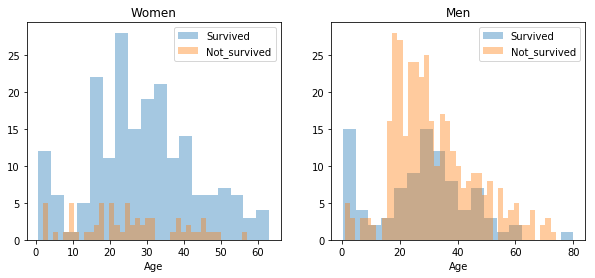

In [12]:
survived="Survived"
not_survived="Not_survived"
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title("Women")
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Men')


the passanger id is not necessarily required  fo perform analysis and the id does not provied any added value to the analysis

In [13]:
train_df = train_df.drop(['PassengerId'], axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**hist():**

the hist() calls the histogram function which displays all the details of columns each as a seperate histogram 

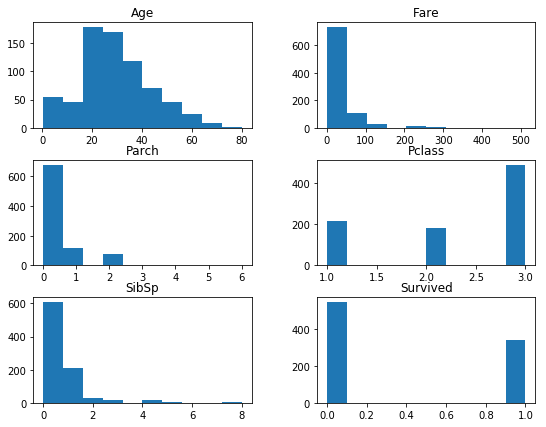

In [14]:
train_df.hist(bins=10,figsize=(9,7),grid=False);

we find where the most of the people in the titanic boarded and it shows most of the people boarded in "S" port

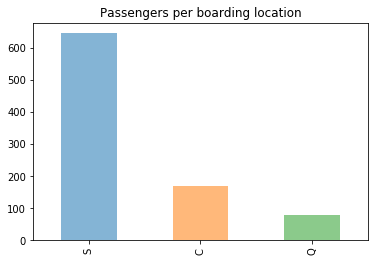

In [15]:
train_df.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers per boarding location");

we find distribution of ages in different classes of passangers. 
the most of the first class passangers were around 30-50
the people in the third class were much younger than the first and second class


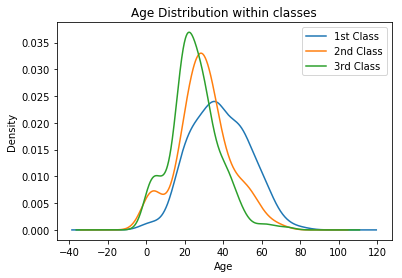

In [16]:
train_df.Age[train_df.Pclass == 1].plot(kind='kde')    
train_df.Age[train_df.Pclass == 2].plot(kind='kde')
train_df.Age[train_df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;


we find the coorelation between the values..What are the correlations useful for
Correlation can help in predicting one attribute from another (Great way to impute missing values).
Correlation can (sometimes) indicate the presence of a causal relationship.
Correlation is used as a basic quantity for many modelling techniques

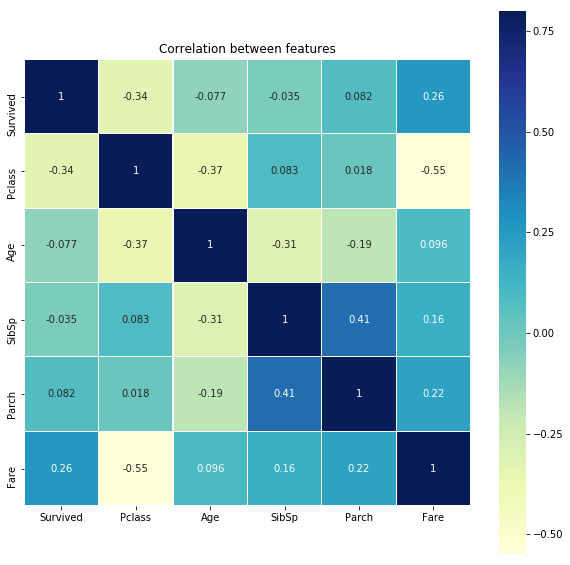

In [17]:
corr=train_df.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

there are two columns "SibSp" , a combination of siblings and spouses which gives the number of siblings or spouses present and the "parch" which is the combination of the parents and childs accompanying a specific passanger


In [18]:
#train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"]+1
#test_df["FamilySize"]=test_df["SibSp"] + test_df["Parch"] +1
#print(train_df["FamilySize"].value_counts())

we drop the column values like name ,tickets and cabin because we dont need them to build our model we drop them in both training and test sets

In [19]:
train_df = train_df.drop(['Name','Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Name','Ticket', 'Cabin'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


we convert the categorical variables into numerics and we first change the sex 
by considering male as 0 and female as 1

In [20]:

sex_mapping = {"male": 0, "female": 1}
train_df['Sex'] = train_df['Sex'].map(sex_mapping)
test_df['Sex'] = test_df['Sex'].map(sex_mapping)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


then we convert the other categorical variable embarked which has three values "S","C" and "Q", as 1,2 and 3 respectively

In [21]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


we fill the age column which we saw had 20% of the data missing by using random numbers between the mean 

In [22]:
guess_ages = np.zeros((2,3))
guess_ages
combine = [train_df, test_df]
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,1
1,1,1,1,38,1,0,71.2833,2
2,1,3,1,26,0,0,7.9250,1
3,1,1,1,35,1,0,53.1000,1
4,0,3,0,35,0,0,8.0500,1


we then classify the differnt ages of the passengers into age 7 groups


In [23]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [24]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()
train_df = train_df.drop(['AgeBand'], axis=1)

In [25]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

we change the fare which is a float into a categorical variable by converting them between 6 differnt groups

In [26]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
train_df['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

after converting all the variables into categories and dropping the columns that are not required we have finished preprocessing our data

In [27]:
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,0,1
1,1,1,1,2,1,0,3,2
2,1,3,1,1,0,0,0,1
3,1,1,1,2,1,0,3,1
4,0,3,0,2,0,0,1,1


we chcek whether the dimensions of the training set and test set match and if the match we use inbuilt sklearn packages to build models

In [28]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

**logistic regression** 
logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.35

**Decision tree**
This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In [30]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.34

In [31]:
"""knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=6, p=2, 
                           weights='uniform')
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn"""

"knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', \n                           metric_params=None, n_jobs=1, n_neighbors=6, p=2, \n                           weights='uniform')\nknn.fit(X_train, Y_train)\ny_pred = knn.predict(X_test)\nacc_knn = round(knn.score(X_train, Y_train) * 100, 2)\nacc_knn"

In [32]:
#gradient boosting algorithm
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X_train, Y_train)
y_pred = gradient_boost.predict(X_test)


In [33]:
#extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X_train, Y_train)
y_pred = ExtraTreesClassifier.predict(X_test)


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [35]:
submission.to_csv('submission', index=False)